# 0. 설정

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers


import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_loss(history):
    plt.plot(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend(('loss', 'v_loss'))
    plt.show()

    

def plot_prediction(y_sample, y_pred):

    plt.figure(figsize=(15,3))
    plt.plot(y_sample, marker='o')
    plt.plot(y_pred, marker='o')
    plt.legend(('y true', 'y pred'))

# 4. 캘리포니아 데이터셋 - 회귀 MLP

## 4-1. 데이터 불러오기

In [2]:
housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
print('* Org data info : ', x_train.shape)
print( x_train[0])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print('\n* Transfored data info : ', x_train.shape)
print( x_train[0])

* Org data info :  (15480, 8)
[   4.2143       37.            5.28823529    0.97352941  860.
    2.52941176   33.81       -118.12      ]

* Transfored data info :  (15480, 8)
[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
 -0.8607415   0.73099911]


## 4-2. 모델 구성

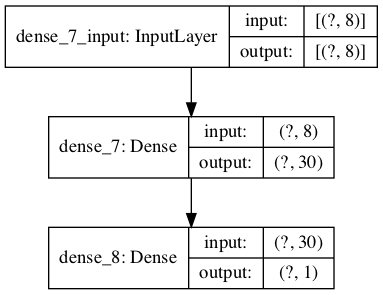

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

tf.keras.utils.plot_model(model, show_shapes=True)

## 4-3. 모델 컴파일

In [26]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 4-4. 모델 평가

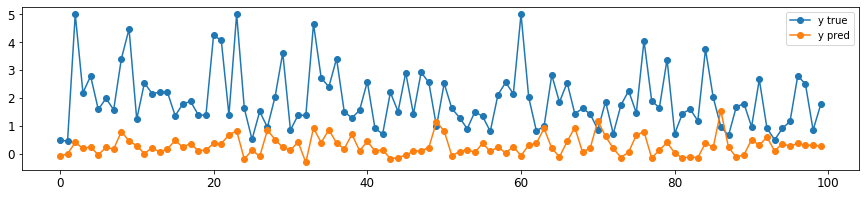

In [29]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)

## 4-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/3
12384/12384 [==============================] - 0s 36us/sample - loss: 1.7457 - val_loss: 0.9431
Epoch 2/3
12384/12384 [==============================] - 0s 27us/sample - loss: 0.8457 - val_loss: 0.8177
Epoch 3/3
12384/12384 [==============================] - 0s 27us/sample - loss: 0.7669 - val_loss: 0.7553


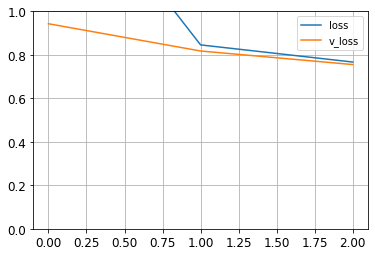

In [6]:
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2)
plot_loss(history)

# 5. 캘리포니아 데이터셋 - 함수형 API

* 모든 신경망 모델이 단순하게 순서대로 나열되지는 않습니다. 어떤 신경망은 매우 복잡한 구조를 가집니다. 여러 개의 입력이 있거나 여러 개의 출력이 있습니다. 

## 5-1. 데이터 불러오기 
* **4**. 에서의 데이터와 같은 데이터를 사용합니다. 

In [8]:
print('x_train, y_train, x_test, y_test shape : ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print( x_train[0])

x_train, y_train, x_test, y_test shape :  (15480, 8) (15480,) (5160, 8) (5160,)
[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
 -0.8607415   0.73099911]


## 5-2. 모델 구성

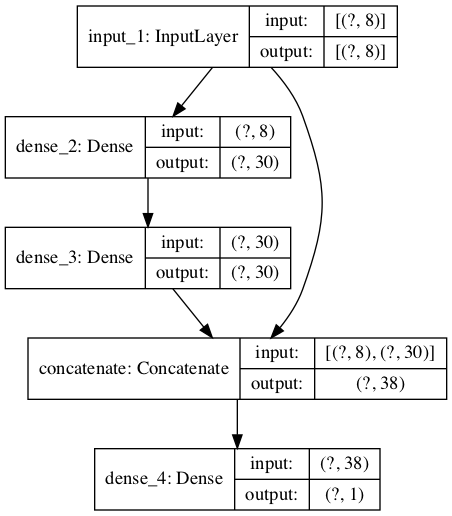

In [9]:
input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.models.Model(inputs=[input_], outputs=[output])

tf.keras.utils.plot_model(model, show_shapes=True)

## 5-3. 모델 컴파일

In [10]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 5-4. 모델 평가

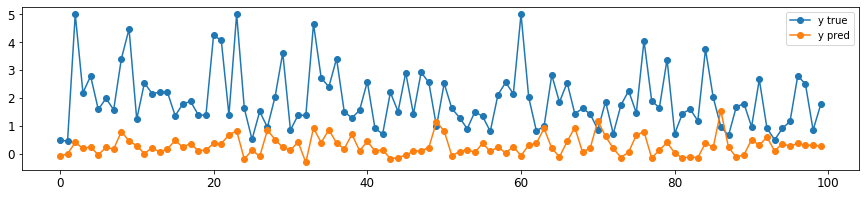

In [30]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)

## 5-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/3
12384/12384 [==============================] - 0s 38us/sample - loss: 1.9141 - val_loss: 0.7682
Epoch 2/3
12384/12384 [==============================] - 0s 28us/sample - loss: 0.7029 - val_loss: 0.6858
Epoch 3/3
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6466 - val_loss: 0.6475


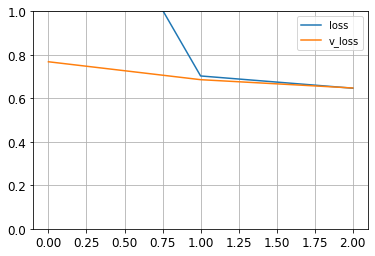

In [12]:
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2)
plot_loss(history)

# 6. 캘리포니아 데이터셋 - 함수형 API 2

* 와이드나 딥 경로에 다른 입력 특성을 전달하면 어떻게 될까요? (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달하겠습니다. 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됩니다.

## 6-1. 데이터 불러오기

In [14]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
print(x_train_A.shape, x_train_B.shape)

(15480, 5) (15480, 6)


## 6-2. 모델 구성

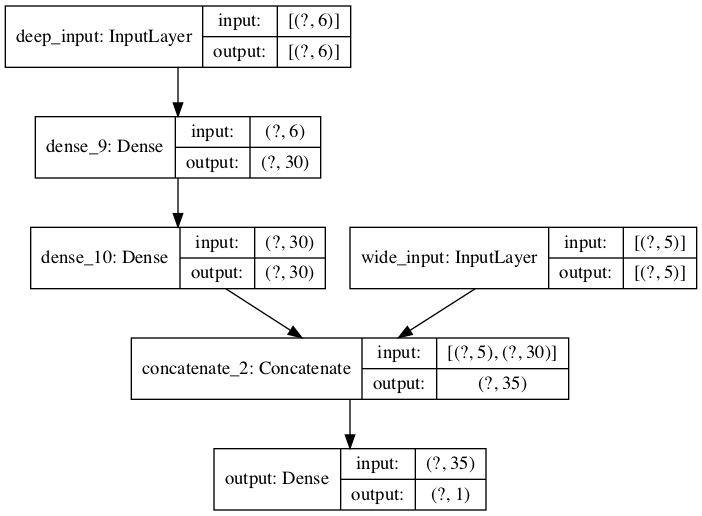

In [32]:
input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])
tf.keras.utils.plot_model(model, show_shapes=True)

## 6-3. 모델 컴파일

In [33]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 6-4. 모델 평가

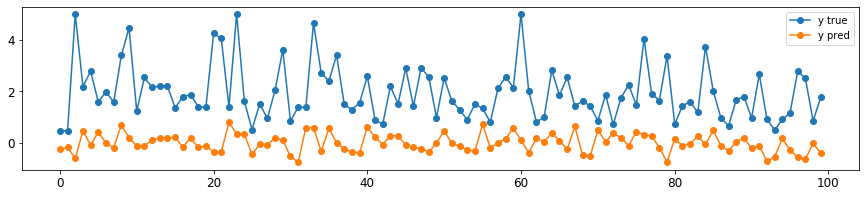

In [34]:
x_sample_A, x_sample_B, y_sample = x_test_A[:100], x_test_B[:100], y_test[:100]
y_pred = model.predict([x_sample_A, x_sample_B])

plot_prediction(y_sample, y_pred)

## 6-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/3
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5626 - val_loss: 0.5807
Epoch 2/3
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5536 - val_loss: 0.5713
Epoch 3/3
12384/12384 [==============================] - 0s 30us/sample - loss: 0.5460 - val_loss: 0.5623


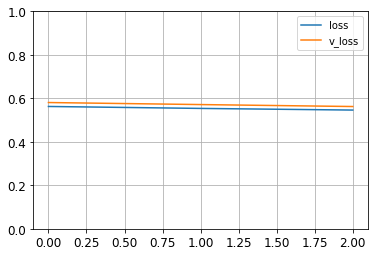

In [19]:
history = model.fit([x_train_A, x_train_B],y_train, epochs=3, validation_split=0.2)
plot_loss(history)

# 7. 캘리포니아 데이터셋 - 함수형 API 3 (p.387)

* 여러개의 출력.
* 아래의 모델과 똑같게 모델을 구성해 봅시다.

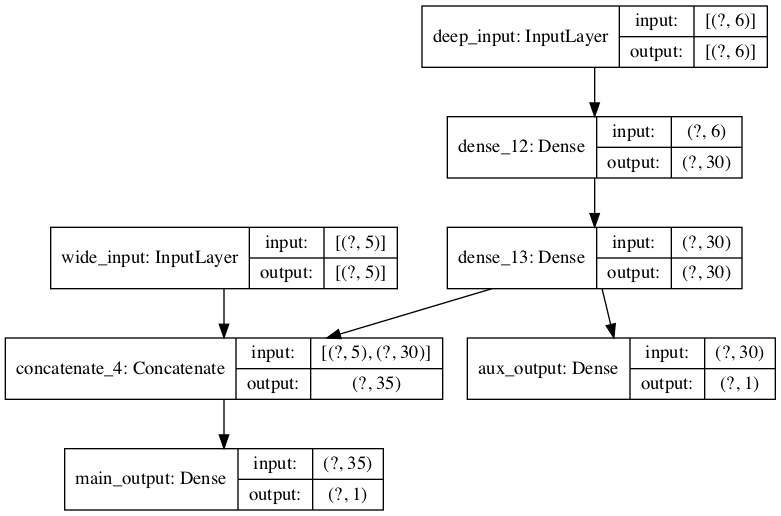

In [21]:
complexModel = tf.keras.models.load_model('complexmodel/')
tf.keras.utils.plot_model(complexModel, show_shapes=True)

# 7-2 모델 구성

## 7-3. 모델 컴파일

## 7-4. 모델 평가

## 7-5. 모델 학습

# 8. 저장과 복원

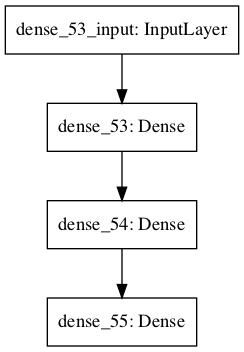

In [87]:
model = tf.keras.models.Sequential([
    layers.Dense(30, activation="relu", input_shape=[8]),
    layers.Dense(30, activation="relu"),
    layers.Dense(1)
])
plot_model(model)

In [90]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

Train on 12384 samples, validate on 3096 samples
Epoch 1/10
12384/12384 [==============================] - 0s 33us/sample - loss: 0.5121 - val_loss: 0.5268
Epoch 2/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5032 - val_loss: 0.5171
Epoch 3/10
12384/12384 [==============================] - 0s 27us/sample - loss: 0.4943 - val_loss: 0.5098
Epoch 4/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.4858 - val_loss: 0.5030
Epoch 5/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.4784 - val_loss: 0.4950
Epoch 6/10
12384/12384 [==============================] - 0s 27us/sample - loss: 0.4710 - val_loss: 0.4890
Epoch 7/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.4644 - val_loss: 0.4832
Epoch 8/10
12384/12384 [==============================] - 0s 27us/sample - loss: 0.4583 - val_loss: 0.4772
Epoch 9/10
12384/12384 [==============================] - 0s 28us/sample - loss: 0.4524 - val_l

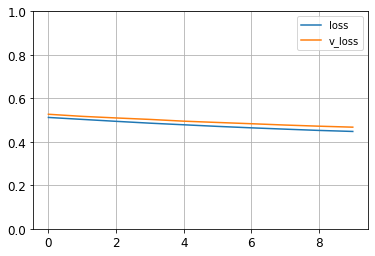

In [97]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
plot_loss(history)

In [93]:
model.save("my_keras_model.h5")

In [95]:
model = tf.keras.models.load_model("my_keras_model.h5")
plot_model(model)

5160/5160 [==============================] - 0s 22us/sample - loss: 0.5268


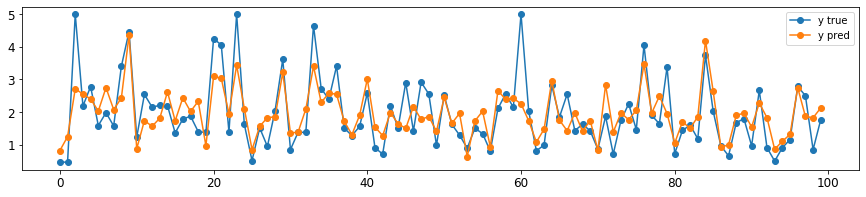

In [96]:
mse_test = model.evaluate(x_test, y_test)
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)

Train on 12384 samples, validate on 3096 samples
Epoch 1/5
12384/12384 [==============================] - 0s 29us/sample - loss: 0.3652 - val_loss: 0.4025
Epoch 2/5
12384/12384 [==============================] - 0s 28us/sample - loss: 0.3650 - val_loss: 0.4006
Epoch 3/5
12384/12384 [==============================] - 0s 28us/sample - loss: 0.3642 - val_loss: 0.3997
Epoch 4/5
12384/12384 [==============================] - 0s 28us/sample - loss: 0.3637 - val_loss: 0.3991
Epoch 5/5
12384/12384 [==============================] - 0s 27us/sample - loss: 0.3630 - val_loss: 0.3992


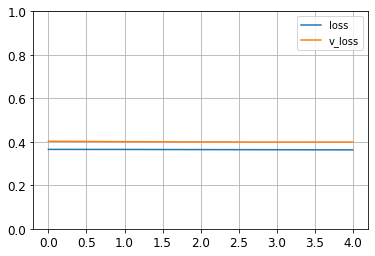

In [102]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=5,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])
plot_loss(history)

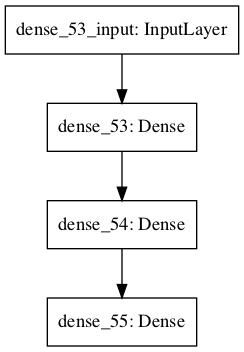

In [104]:
model = tf.keras.models.load_model("my_keras_model.h5")
plot_model(model)

5160/5160 [==============================] - 0s 26us/sample - loss: 0.3806


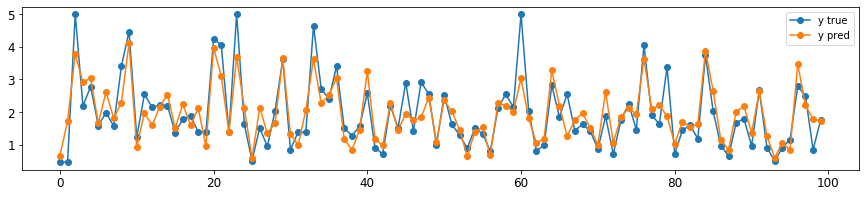

In [105]:
mse_test = model.evaluate(x_test, y_test)
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)